In [391]:
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem.PropertyMol import PropertyMol
Chem.SetDefaultPickleProperties(Chem.PropertyPickleOptions.AllProps)
import pickle
import sys
from pathlib import Path

In [392]:
sys.path.append('../recombination')
sys.path.append('../recombination/construct_ligands')
from construct_ligand import construct_ligand, read_fragment_library
from novelty import read_scaffolds

In [393]:
def pickle_loader(pickle_file):

    try:
        while True:
            yield pickle.load(pickle_file)
    except EOFError:
        pass

In [394]:
file_name = '../CombinatorialLibrary/combinatorial_library.pickle'

In [402]:
# with open(file_name, 'rb') as pickle_file:
#     ligands = []
#     for ligand in pickle_loader(pickle_file):
#         ligands.append(ligand)

In [421]:
## how many ligands have ONLY the same PDB?
with open(file_name, 'rb') as pickle_file:
    
    for i, ligand in enumerate(pickle_loader(pickle_file)):

        ligand, pdbs, fragpdbs = construct_ligand(ligand.meta, data)
        if len(list(set(pdbs))) == 1:
            print(i, pdbs, ligand.original)

StopIteration: 

In [416]:
count_original = 0
count_original_sub = 0
chembl_match = 0
with open(file_name, 'rb') as pickle_file:
    
    for i, ligand in enumerate(pickle_loader(pickle_file)):
    
        count_original += ligand.original
        count_original_sub += ligand.original_sub
        chembl_match += ligand.chembl_match

In [417]:
count_original, count_original_sub, chembl_match

(39, 191, 138)

In [410]:
# select a certain ligand
with open(file_name, 'rb') as pickle_file:
    
    for i in range(10430):
        ligand = next(pickle_loader(pickle_file))

In [404]:
mol = construct_ligand(ligand.meta, data)[0]

In [418]:
data = read_fragment_library(Path('../FragmentLibrary'))

Number of fragments in FP : 220
Number of fragments in B2 : 55
Number of fragments in AP : 238
Number of fragments in SE : 169
Number of fragments in B1 : 30
Number of fragments in GA : 124


In [72]:
novel_but_scaffold = []
not_novel_but_no_scaffold = []
for i, l in enumerate(ligands):
    if l.chembl_match == 0 and l.original == 0 and l.original_sub == 0 and l.lipinski == 1 and l.scaffold:
        novel_but_scaffold.append(i)
    if l.chembl_match == 1 or l.original == 1 or l.original_sub == 1:
        if l.scaffold == 0:
            not_novel_but_no_scaffold.append(i)
    
    
print('\nNot novel but no scaffold:', not_novel_but_no_scaffold, len(not_novel_but_no_scaffold))
print('\nNovel but contains scaffold and fulfills Lipinski:', len(novel_but_scaffold))


Not novel but no scaffold: [] 0

Novel but contains scaffold and fulfills Lipinski: 4904


In [73]:
# novel but contains scaffold and fulfills lipinski
ligand = ligands[1]

In [406]:
mol = construct_ligand(ligand.meta, data)[0]

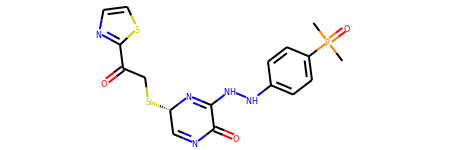

In [407]:
AllChem.Compute2DCoords(mol)
mol

In [399]:
ligand.original, ligand.original_sub, ligand.chembl_match

(0, 0, 0)

In [400]:
ligand.lipinski, ligand.hba, ligand.hbd, ligand.mwt, ligand.logp

(1, 1, 1, 0, 1)

In [408]:
highlightAtomLists = []
legends = []
for subpocket in ['AP', 'FP', 'SE', 'GA', 'B1', 'B2']:
    highlight_atoms = []
    legend = subpocket
    for atom in mol.GetAtoms():
        if atom.HasProp('subpocket'):
            if atom.GetProp('subpocket') == subpocket:
                highlight_atoms.append(atom.GetIdx())
                legend = subpocket + ': '+atom.GetProp('frag_id')
    highlightAtomLists.append(highlight_atoms)
    legends.append(legend)

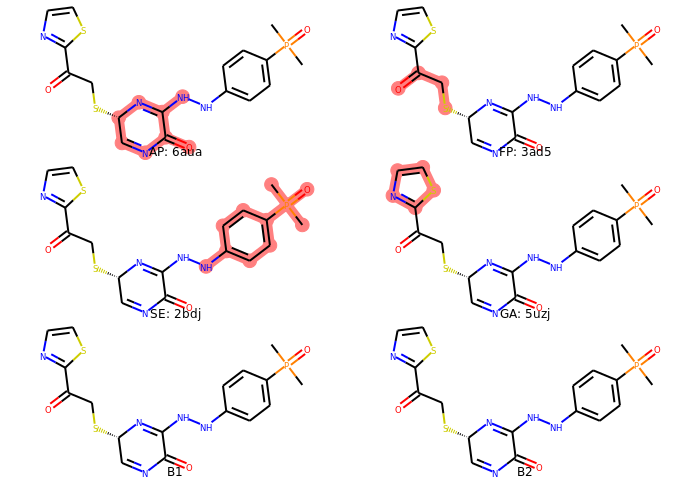

In [409]:
Draw.MolsToGridImage([mol, mol, mol, mol, mol, mol], 
                     highlightAtomLists=highlightAtomLists, legends=legends, molsPerRow=2, subImgSize=(350, 160))

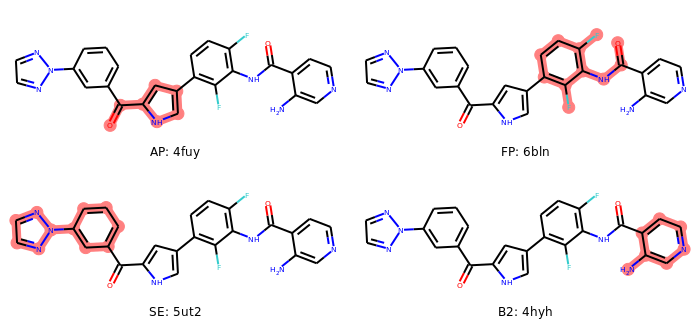

In [320]:
highlightAtomLists = list(highlightAtomLists[i] for i in [0,1,2,5])
legends = list(legends[i] for i in [0,1,2,5])
Draw.MolsToGridImage([mol, mol, mol, mol], 
                     highlightAtomLists=highlightAtomLists, legends=legends, molsPerRow=2, subImgSize=(350, 160))

In [87]:
# kinase inhibitor scaffolds identified by Hu and Bajorath (dx.doi.org/10.1021/jm501237k | J. Med. Chem. 2015, 58, 315−332)
scaffolds = read_scaffolds(['../../data/Kinase_Inhibitors_And_Scaffolds/Ki_Subset/Kinase_Based_Scaffold_Sets_Ki.dat',
                            '../../data/Kinase_Inhibitors_And_Scaffolds/IC50_Subset/Kinase_Based_Scaffold_Sets_IC50.dat'])

Read ../../data/Kinase_Inhibitors_And_Scaffolds/Ki_Subset/Kinase_Based_Scaffold_Sets_Ki.dat
Read ../../data/Kinase_Inhibitors_And_Scaffolds/IC50_Subset/Kinase_Based_Scaffold_Sets_IC50.dat
Number of kinase inhibitor scaffolds: 12858


RDKit WARNING: [13:09:55] WARNING: could not find number of expected rings. Switching to an approximate ring finding algorithm.


,Kinase_CHEMBLID,KinaseName,KinaseGroup,BM_ID,NumInhibitors,BM_SMILES,CSK_SMILES,InhibitorList[sortedByCHEMBLID],mol
161,CHEMBL2276,c-Jun N-terminal kinase 1,CMGC,39015,2,n1ccccc1,C1CCCCC1,CHEMBL208637|CHEMBL211605,
279,CHEMBL2637,c-Jun N-terminal kinase 3,CMGC,39015,1,n1ccccc1,C1CCCCC1,CHEMBL208637,
307,CHEMBL267,Tyrosine-protein kinase SRC,TK,33365,1,c1ccccc1,C1CCCCC1,CHEMBL217863,
585,CHEMBL299,Protein kinase C alpha,AGC,33365,2,c1ccccc1,C1CCCCC1,CHEMBL494361|CHEMBL523053,
609,CHEMBL2996,Protein kinase C delta,AGC,33365,2,c1ccccc1,C1CCCCC1,CHEMBL494361|CHEMBL523053,
620,CHEMBL3023,Sphingosine kinase 2,OTHER,33365,1,c1ccccc1,C1CCCCC1,CHEMBL583979,
1108,CHEMBL4394,Sphingosine kinase 1,OTHER,33365,2,c1ccccc1,C1CCCCC1,CHEMBL2409758|CHEMBL583979,
1192,CHEMBL4900,Serine/threonine-protein kinase D2,CAMK,39015,1,n1ccccc1,C1CCCCC1,CHEMBL208637,
1222,CHEMBL5469,Protein tyrosine kinase 2 beta,TK,33365,1,c1ccccc1,C1CCCCC1,CHEMBL76904,
203,CHEMBL1741200,Putative hexokinase HKDC1,OTHER,33365,1,c1ccccc1,C1CCCCC1,CHEMBL1451059,

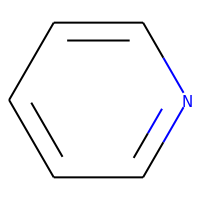
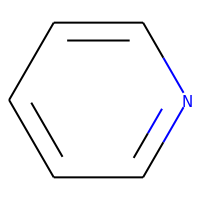
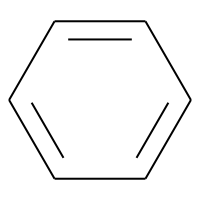
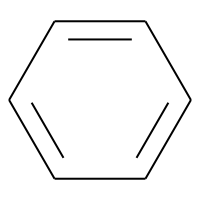
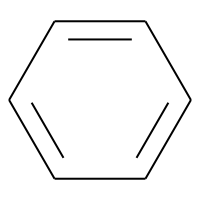
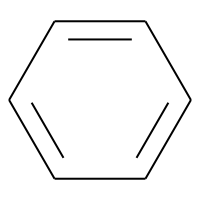
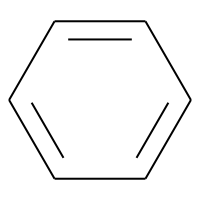
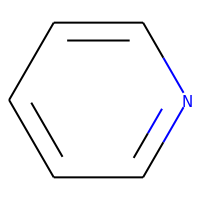
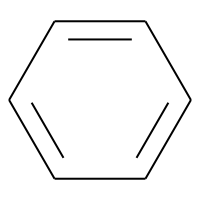
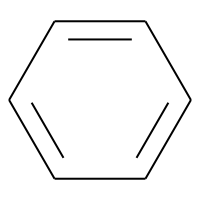
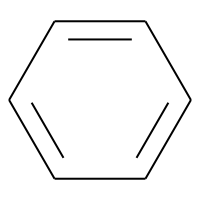
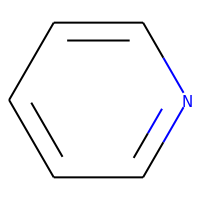
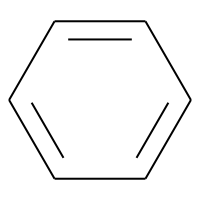
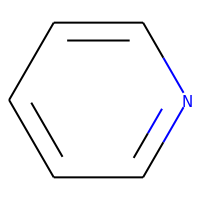
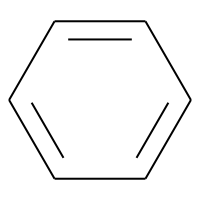
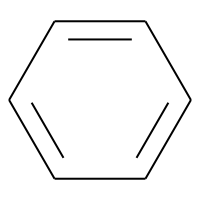
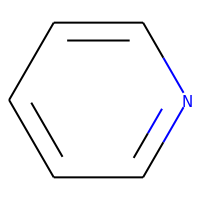
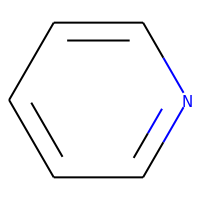
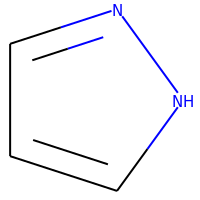
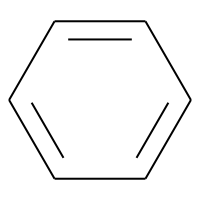
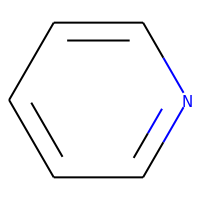
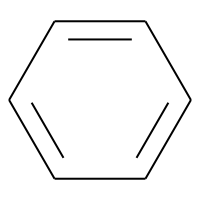
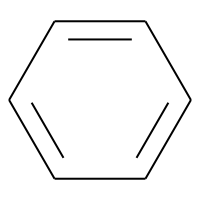
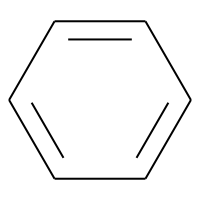
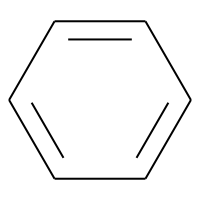
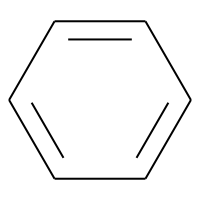
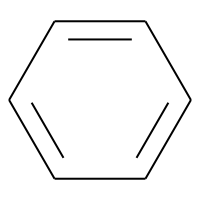
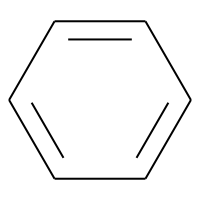
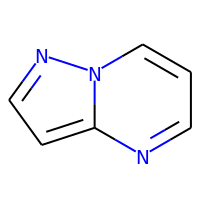
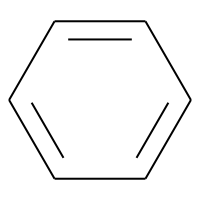
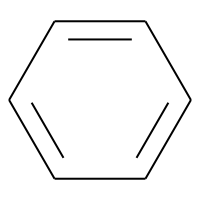
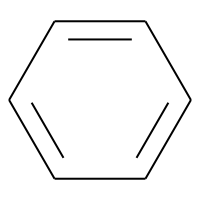
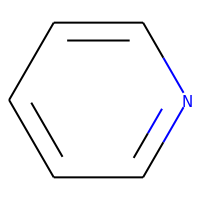
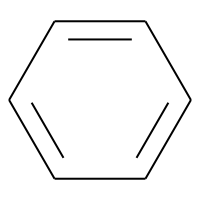
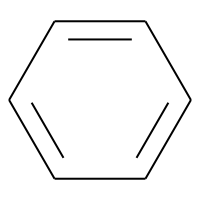
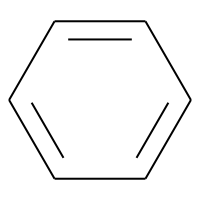
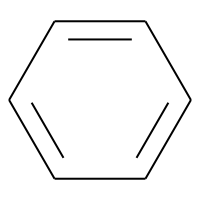

In [90]:
scaffolds[scaffolds.mol <= mol]